In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv('train.csv')

In [3]:
train.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [6]:
train.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


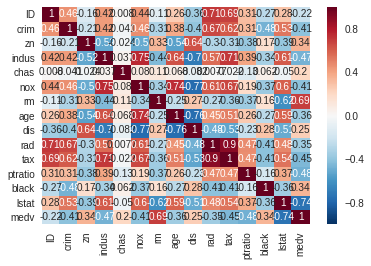

In [8]:
sns.heatmap(train.corr(),annot=True)

In [10]:
train.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [19]:
X=train[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat']]
y=train[['medv']]

In [20]:
from sklearn.cross_validation import train_test_split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [23]:
B=[[0,0,0,0,0,0,0,0,0,0,0,0,0]]

In [41]:
A=np.transpose(X_train)

In [53]:
from numpy.linalg import pinv

In [54]:
#A.shape
#X_train.shape
C=pinv(np.matmul(A,X_train))

In [46]:
D=np.matmul(C,A)

In [47]:
B=np.matmul(D,y_train)

In [48]:
B

array([[-0.02414623],
       [ 0.05828412],
       [ 0.07962055],
       [ 4.04963685],
       [ 0.25593631],
       [ 5.60090233],
       [-0.02028953],
       [-0.99565793],
       [ 0.21939032],
       [-0.01281908],
       [-0.28170799],
       [ 0.0149253 ],
       [-0.47772329]])

In [49]:
h=np.matmul(X_test,B)

In [50]:
Err=np.subtract(h,y_test)

In [52]:
np.mean(Err)

medv    0.571019
dtype: float64

In [73]:
import sklearn.metrics as mt

In [74]:
print("RMSE: ",np.sqrt(mt.mean_squared_error(y_test,h)))

RMSE:  4.80114965222


In [55]:
test=pd.read_csv('test.csv')

In [56]:
test.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat'],
      dtype='object')

In [57]:
X_test_data=test[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat']]

In [58]:
pred=np.matmul(X_test_data,B)

In [59]:
pred

array([[ 30.99959593],
       [ 25.01481773],
       [ 17.7837765 ],
       [  9.2387803 ],
       [ 17.23759248],
       [ 18.20960437],
       [ 19.12707432],
       [ 16.78253419],
       [ 13.6185509 ],
       [ 16.41001353],
       [ 21.49581182],
       [ 23.12831089],
       [  9.70139199],
       [ 14.6052431 ],
       [ 22.51252575],
       [ 21.00176803],
       [ 22.45231593],
       [ 28.89390283],
       [  6.95382509],
       [ 27.4696488 ],
       [ 21.40008406],
       [ 24.84213361],
       [ 19.99076541],
       [ 21.19512281],
       [ 20.55401037],
       [ 21.09645744],
       [ 25.85501871],
       [ 25.61116766],
       [ 28.57744608],
       [ 26.79033879],
       [ 36.255339  ],
       [ 35.9104205 ],
       [ 31.92722753],
       [ 21.37290449],
       [ 17.82250814],
       [ 21.58941678],
       [ 18.73903026],
       [ 19.10343437],
       [ 18.27613412],
       [ 23.25567409],
       [ 16.02670626],
       [ 23.12927119],
       [ 23.02237754],
       [ 20

In [71]:
ID=test[['ID']]
ID=ID.as_matrix()
ID
pd.DataFrame(pred,columns=['Predictions'])

,Predictions
0,30.999596
1,25.014818
2,17.783777
3,9.238780
4,17.237592
5,18.209604
6,19.127074
7,16.782534
8,13.618551
9,16.410014
